In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
tf.__version__

'2.4.1'

In [28]:
# checking if GPU enabled
tf.test.is_gpu_available()

False

# Data Augmentation - Creating more data from existing data

In [29]:
# Preprocessing is Resizing and Rescaling

In [30]:
training_data_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, zoom_range=0.2, shear_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.1)

In [31]:
train=training_data_generator.flow_from_directory('/content/drive/MyDrive/Training Data', target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=16, subset='training')

validation=training_data_generator.flow_from_directory('/content/drive/MyDrive/Training Data', target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=16, subset='validation')

Found 12376 images belonging to 2 classes.
Found 1374 images belonging to 2 classes.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Now to Make our CNN

In [33]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

#adding first layer

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
        
#Third layer
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Flatten Layer
cnn.add(tf.keras.layers.Flatten())

#Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)           

# Train CNN Model

Compile and Train

In [35]:
batch_size=16

In [38]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/models/fire_and_smoke_model.h5',monitor='val_loss',mode='min',save_best_only=True)

callbacks=checkpoint

In [40]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=1,steps_per_epoch=train.samples//batch_size, validation_steps=validation.samples//batch_size, callbacks=callbacks)

773/773 [==============================] - 2535s 3s/step - loss: 0.0770 - accuracy: 0.9787 - val_loss: 0.0091 - val_accuracy: 0.9971


In [44]:
from tensorflow.keras.models import load_model
cnn=load_model('/content/drive/MyDrive/models/fire_and_smoke_model.h5')

In [51]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)           

In [92]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [1]:
# ENter the path of image you want to test
t_image='/content/drive/MyDrive/Training Data/Fire/14.jpg'

FIRE


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Fire')

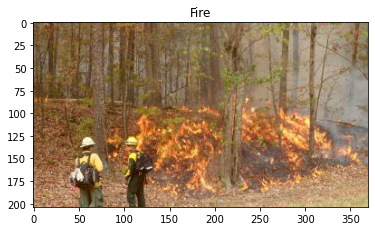

In [96]:
test_image=image.load_img(t_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image, axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Smoke']

if result[0][0]==0:
  print("FIRE")
else:
  print("SMOKE")

image_show=PIL.Image.open(t_image)
plt.imshow(image_show)
plt.title(Catagories[result[0][0]])